In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.utils import plot_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
pip install pydot graphviz


In [ ]:
df1=pd.read_csv('nestle.csv')
df2=pd.read_csv('colgate.csv')
df3=pd.read_csv('bajaj.csv')
df4=pd.read_csv('unsp.csv')
df5=pd.read_csv('muthoot.csv')

## Add new stocks data from the grp 10 more stocks



In [2]:
df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y')
df1.sort_values('Date', inplace=True)

df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y')
df2.sort_values('Date', inplace=True)
## Repeat for stock 3,4,5

df3['Date'] = pd.to_datetime(df3['Date'], format='%d-%m-%Y')
df3.sort_values('Date', inplace=True)

df4['Date'] = pd.to_datetime(df4['Date'], format='%d-%m-%Y')
df4.sort_values('Date', inplace=True)

df5['Date'] = pd.to_datetime(df5['Date'], format='%d-%m-%Y')
df5.sort_values('Date', inplace=True)


close_prices_df1 = df1['Close'].values.reshape(-1, 1)
close_prices_df2 = df2['Close'].values.reshape(-1, 1)
close_prices_df3 = df5['Close'].values.reshape(-1, 1)
close_prices_df4 = df4['Close'].values.reshape(-1, 1)
close_prices_df5 = df5['Close'].values.reshape(-1, 1)

## Repeat for stock 3,4,5


scaler = MinMaxScaler(feature_range=(0, 1))

scaled_close_prices_df1 = scaler.fit_transform(close_prices_df1)
scaled_close_prices_df2 = scaler.fit_transform(close_prices_df2)
scaled_close_prices_df3 = scaler.fit_transform(close_prices_df3)
scaled_close_prices_df4 = scaler.fit_transform(close_prices_df4)
scaled_close_prices_df5 = scaler.fit_transform(close_prices_df5)

## Repeat for stock 3,4,5





NameError: name 'df1' is not defined

In [3]:
def create_dataset(data, time_step=60):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X1, Y1 = create_dataset(scaled_close_prices_df1, time_step)
X1 = X1.reshape(X1.shape[0], X1.shape[1], 1)  

X2, Y2 = create_dataset(scaled_close_prices_df2, time_step)
X2 = X2.reshape(X2.shape[0], X2.shape[1], 1)  

X3, Y3 = create_dataset(scaled_close_prices_df3, time_step)
X3 = X3.reshape(X3.shape[0], X3.shape[1], 1)  

X4, Y4 = create_dataset(scaled_close_prices_df4, time_step)
X4 = X4.reshape(X4.shape[0], X4.shape[1], 1)  

X5, Y5 = create_dataset(scaled_close_prices_df5, time_step)
X5 = X5.reshape(X5.shape[0], X5.shape[1], 1)  



NameError: name 'scaled_close_prices_df1' is not defined

Model for stock 1

In [4]:
# Split the data into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(256, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history=model.fit(X1_train, y1_train, epochs=100, batch_size=32, validation_data=(X1_test, y1_test))


# Evaluate the model
test_loss_1 = model.evaluate(X1_test, y1_test)

# Make predictions
predictions_df1 = model.predict(X1_test)

# Inverting predictions to original price scale
predictions_df1 = scaler.inverse_transform(predictions_df1)
y1_test_scaled = scaler.inverse_transform(y1_test.reshape(-1, 1))

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y1_test_scaled, label='Actual Closing Price')
plt.plot(predictions_df1, label='Predicted Closing Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

NameError: name 'X1' is not defined

In [5]:
model.summary()


NameError: name 'model' is not defined

In [19]:
loss = model.evaluate(X1_test, y1_test, verbose=0)
print(f"Test Loss: {loss}")

Test Loss: 0.00039747520349919796


In [23]:
accuracy = model.evaluate(X1_test, y1_test, verbose=0)
accuracy

0.00039747520349919796

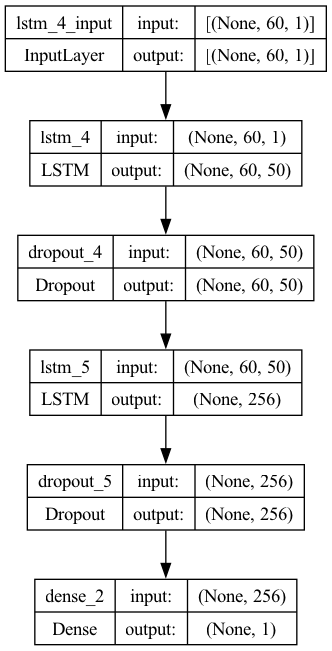

In [20]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(filename='model_plot.png')



In [125]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


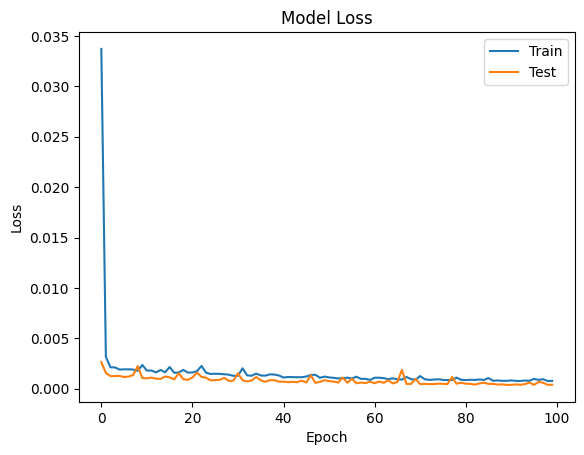

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
mse = mean_squared_error(y_true, y_pred)


Mean Squared Error: 675.3036527355785
Root Mean Squared Error: 25.986605256084882
Mean Absolute Error: 19.18911914485968
Mean Absolute Percentage Error: 1.8249763083028614%
R-squared: 0.9919480172869176


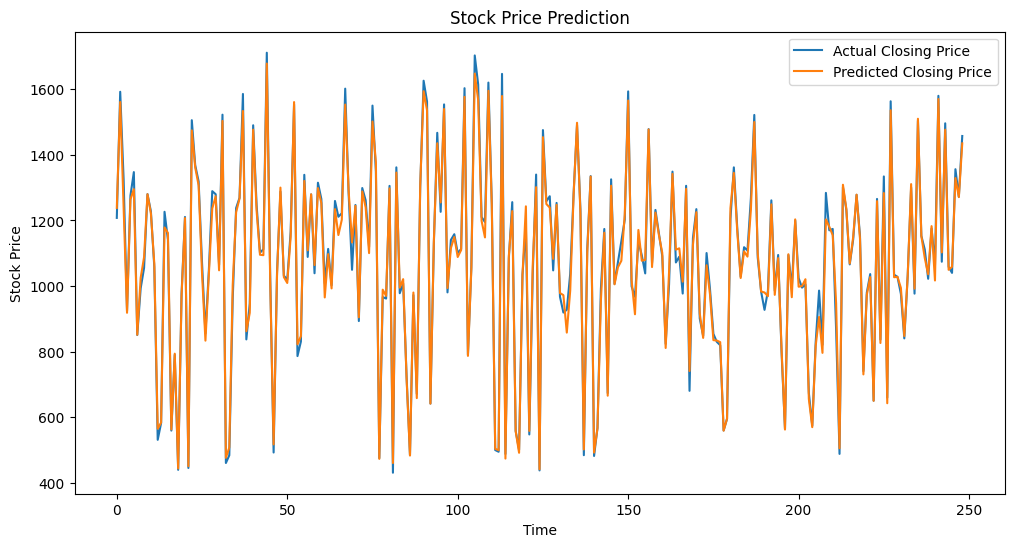

In [25]:
mse = mean_squared_error(y1_test_scaled, predictions_df1)
print(f"Mean Squared Error: {mse}")

# RMSE - Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# MAE - Mean Absolute Error
mae = mean_absolute_error(y1_test_scaled, predictions_df1)
print(f"Mean Absolute Error: {mae}")

# MAPE - Mean Absolute Percentage Error
mape = np.mean(np.abs((y1_test_scaled - predictions_df1) / y1_test_scaled)) * 100
print(f"Mean Absolute Percentage Error: {mape}%")

# R-squared
r_squared = r2_score(y1_test_scaled, predictions_df1)
print(f"R-squared: {r_squared}")

# Plotting the results
plt.figure(figsize=(12,6))
plt.plot(y1_test_scaled, label='Actual Closing Price')
plt.plot(predictions_df1, label='Predicted Closing Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Model for stock 2

Epoch 1/100
32/32 [==============================] - 2s 76ms/step - loss: 7.0524e-04 - val_loss: 2.8447e-04
Epoch 2/100
32/32 [==============================] - 2s 72ms/step - loss: 6.1267e-04 - val_loss: 9.1979e-04
Epoch 3/100
32/32 [==============================] - 2s 73ms/step - loss: 0.0010 - val_loss: 3.4237e-04
Epoch 4/100
32/32 [==============================] - 2s 71ms/step - loss: 6.6527e-04 - val_loss: 2.6029e-04
Epoch 5/100
32/32 [==============================] - 2s 72ms/step - loss: 6.2945e-04 - val_loss: 2.6072e-04
Epoch 6/100
32/32 [==============================] - 2s 70ms/step - loss: 6.2271e-04 - val_loss: 2.6587e-04
Epoch 7/100
32/32 [==============================] - 2s 71ms/step - loss: 6.4399e-04 - val_loss: 3.2807e-04
Epoch 8/100
32/32 [==============================] - 2s 71ms/step - loss: 6.5564e-04 - val_loss: 2.7074e-04
Epoch 9/100
32/32 [==============================] - 2s 71ms/step - loss: 6.4338e-04 - val_loss: 2.6948e-04
Epoch 10/100
32/32 [============

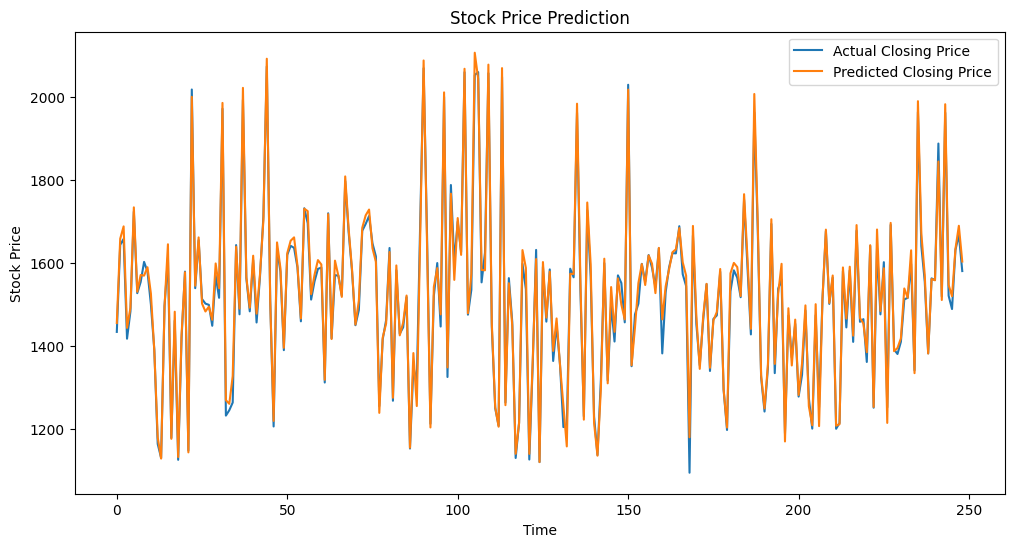

In [74]:
# Split the data into train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)


# Train the model
model.fit(X2_train, y2_train, epochs=100, batch_size=32, validation_data=(X2_test, y2_test))
test_loss_2 = model.evaluate(X2_test, y2_test)
predictions_df2= model.predict(X2_test)
predictions_df2 = scaler.inverse_transform(predictions_df2)
y2_test_scaled = scaler.inverse_transform(y2_test.reshape(-1, 1))

# Plotting the results
plt.figure(figsize=(12,6))
plt.plot(y2_test_scaled, label='Actual Closing Price')
plt.plot(predictions_df2, label='Predicted Closing Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Epoch 1/100
32/32 [==============================] - 2s 71ms/step - loss: 6.2567e-04 - val_loss: 3.2141e-04
Epoch 2/100
32/32 [==============================] - 2s 70ms/step - loss: 6.0732e-04 - val_loss: 2.9332e-04
Epoch 3/100
32/32 [==============================] - 2s 68ms/step - loss: 6.5268e-04 - val_loss: 3.0132e-04
Epoch 4/100
32/32 [==============================] - 2s 68ms/step - loss: 6.7251e-04 - val_loss: 5.0521e-04
Epoch 5/100
32/32 [==============================] - 2s 69ms/step - loss: 6.4717e-04 - val_loss: 3.2268e-04
Epoch 6/100
32/32 [==============================] - 2s 70ms/step - loss: 6.0808e-04 - val_loss: 3.5364e-04
Epoch 7/100
32/32 [==============================] - 2s 68ms/step - loss: 6.7327e-04 - val_loss: 4.8347e-04
Epoch 8/100
32/32 [==============================] - 2s 70ms/step - loss: 6.9954e-04 - val_loss: 3.6108e-04
Epoch 9/100
32/32 [==============================] - 2s 70ms/step - loss: 7.8492e-04 - val_loss: 3.6654e-04
Epoch 10/100
32/32 [========

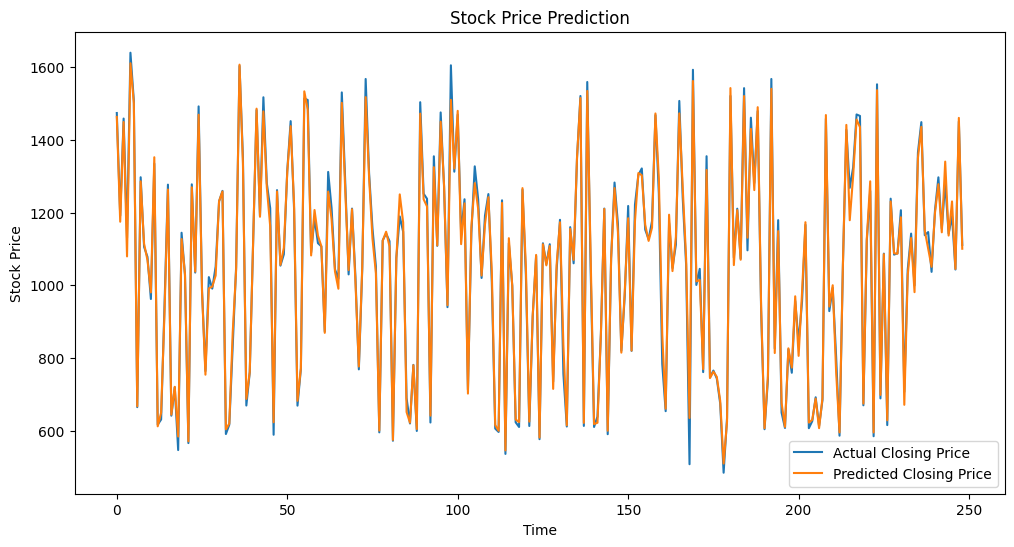

In [81]:
# Split the data into train and test sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y3, test_size=0.2, random_state=42)


# Train the model
model.fit(X3_train, y3_train, epochs=100, batch_size=32, validation_data=(X3_test, y3_test))
test_loss_3 = model.evaluate(X3_test, y3_test)
predictions_df3= model.predict(X3_test)
predictions_df3 = scaler.inverse_transform(predictions_df3)
y3_test_scaled = scaler.inverse_transform(y3_test.reshape(-1, 1))

# Plotting the results
plt.figure(figsize=(12,6))
plt.plot(y3_test_scaled, label='Actual Closing Price')
plt.plot(predictions_df3, label='Predicted Closing Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Epoch 1/100
32/32 [==============================] - 2s 71ms/step - loss: 6.6458e-04 - val_loss: 5.9518e-04
Epoch 2/100
32/32 [==============================] - 2s 68ms/step - loss: 6.3357e-04 - val_loss: 5.7272e-04
Epoch 3/100
32/32 [==============================] - 2s 66ms/step - loss: 6.0071e-04 - val_loss: 7.1293e-04
Epoch 4/100
32/32 [==============================] - 2s 67ms/step - loss: 6.7668e-04 - val_loss: 5.7578e-04
Epoch 5/100
32/32 [==============================] - 2s 67ms/step - loss: 6.5579e-04 - val_loss: 5.6423e-04
Epoch 6/100
32/32 [==============================] - 2s 66ms/step - loss: 6.1372e-04 - val_loss: 5.4050e-04
Epoch 7/100
32/32 [==============================] - 2s 67ms/step - loss: 6.5261e-04 - val_loss: 6.2241e-04
Epoch 8/100
32/32 [==============================] - 2s 66ms/step - loss: 6.6398e-04 - val_loss: 5.3398e-04
Epoch 9/100
32/32 [==============================] - 2s 66ms/step - loss: 6.1438e-04 - val_loss: 6.2894e-04
Epoch 10/100
32/32 [========

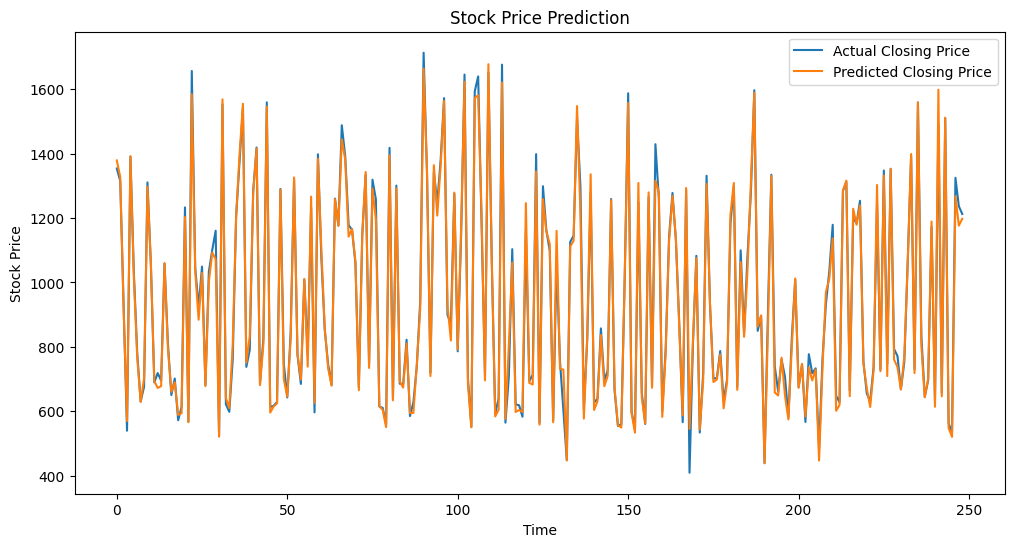

In [82]:
# Split the data into train and test sets
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, Y4, test_size=0.2, random_state=42)


# Train the model
model.fit(X4_train, y4_train, epochs=100, batch_size=32, validation_data=(X4_test, y4_test))
test_loss_4 = model.evaluate(X4_test, y4_test)
predictions_df4= model.predict(X4_test)
predictions_df4 = scaler.inverse_transform(predictions_df4)
y4_test_scaled = scaler.inverse_transform(y4_test.reshape(-1, 1))

# Plotting the results
plt.figure(figsize=(12,6))
plt.plot(y4_test_scaled, label='Actual Closing Price')
plt.plot(predictions_df4, label='Predicted Closing Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Epoch 1/100
32/32 [==============================] - 2s 71ms/step - loss: 5.6009e-04 - val_loss: 2.8945e-04
Epoch 2/100
32/32 [==============================] - 2s 70ms/step - loss: 5.0585e-04 - val_loss: 3.2667e-04
Epoch 3/100
32/32 [==============================] - 2s 70ms/step - loss: 5.1491e-04 - val_loss: 3.0755e-04
Epoch 4/100
32/32 [==============================] - 2s 70ms/step - loss: 5.3381e-04 - val_loss: 3.2729e-04
Epoch 5/100
32/32 [==============================] - 2s 70ms/step - loss: 5.0899e-04 - val_loss: 3.2667e-04
Epoch 6/100
32/32 [==============================] - 2s 71ms/step - loss: 5.3894e-04 - val_loss: 3.5284e-04
Epoch 7/100
32/32 [==============================] - 2s 70ms/step - loss: 5.8662e-04 - val_loss: 2.9662e-04
Epoch 8/100
32/32 [==============================] - 2s 70ms/step - loss: 4.8533e-04 - val_loss: 3.1396e-04
Epoch 9/100
32/32 [==============================] - 2s 70ms/step - loss: 4.9336e-04 - val_loss: 2.8516e-04
Epoch 10/100
32/32 [========

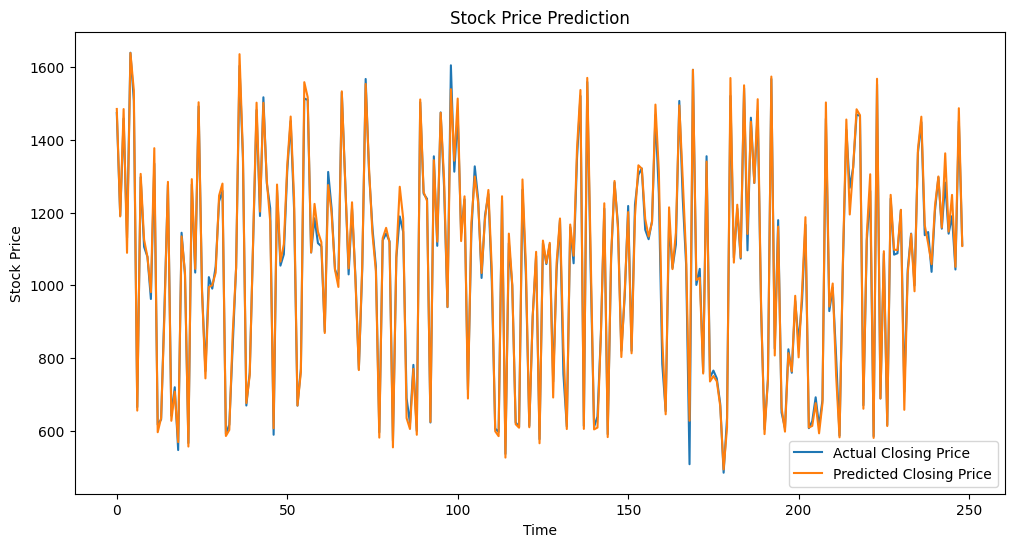

In [83]:
# Split the data into train and test sets
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, Y5, test_size=0.2, random_state=42)


# Train the model
model.fit(X5_train, y5_train, epochs=100, batch_size=32, validation_data=(X5_test, y5_test))
test_loss_5 = model.evaluate(X5_test, y5_test)
predictions_df5= model.predict(X5_test)
predictions_df5 = scaler.inverse_transform(predictions_df5)
y5_test_scaled = scaler.inverse_transform(y5_test.reshape(-1, 1))

# Plotting the results
plt.figure(figsize=(12,6))
plt.plot(y5_test_scaled, label='Actual Closing Price')
plt.plot(predictions_df5, label='Predicted Closing Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## Repeat for stock 3,4,5
#Use the same code for model 3,4,5

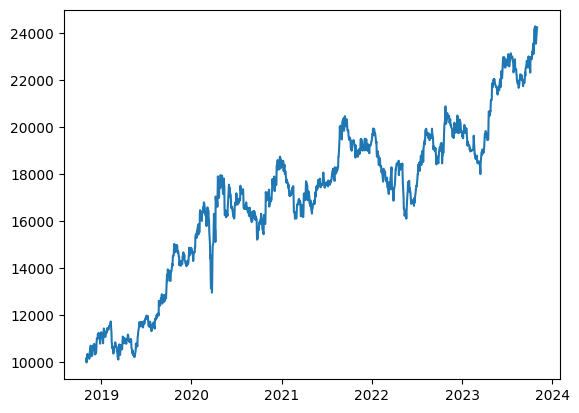

In [84]:
plt.plot(df1['Date'],df1['Close'])

In [89]:

n_predictions = len(predictions_df1)
last_date = df1['Date'].iloc[-1]  # Last date in your original dataset
future_dates = [last_date + pd.Timedelta(days=x) for x in range(1, n_predictions + 1)]

predictions_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Close': predictions_df1.flatten()  # Flatten in case predictions are 2D
})

df1 = df1.sort_values(by='Date')
combined_df = pd.concat([df1, predictions_df], ignore_index=True)

# Now 'combined_df' contains both historical and predicted values, with corresponding dates

In [86]:

n_predictions2 = len(predictions_df2)
last_date2 = df2['Date'].iloc[-1]  # Last date in your original dataset
future_dates2 = [last_date2 + pd.Timedelta(days=x) for x in range(1, n_predictions2 + 1)]

predictions_df2 = pd.DataFrame({
    'Date': future_dates2,
    'Predicted_Close': predictions_df2.flatten()  # Flatten in case predictions are 2D
})


df2 = df2.sort_values(by='Date')


combined_df2 = pd.concat([df2, predictions_df2], ignore_index=True)

# Now 'combined_df' contains both historical and predicted values, with corresponding dates

In [97]:

n_predictions3 = len(predictions_df3)
last_date3 = df3['Date'].iloc[-1]  # Last date in your original dataset
future_dates3 = [last_date3 + pd.Timedelta(days=x) for x in range(1, n_predictions3 + 1)]

predictions_df3 = pd.DataFrame({
    'Date': future_dates3,
    'Predicted_Close': predictions_df3['Predicted_Close']  # Flatten in case predictions are 2D
})


df3 = df3.sort_values(by='Date')


combined_df3 = pd.concat([df3, predictions_df3], ignore_index=True)



In [98]:
combined_df3

,Date,Close,Open,High,Low,Volume,Predicted_Close
0,2018-11-01,2593.70,2620.00,2620.00,2568.05,379793.0,NaN
1,2018-11-02,2598.85,2620.00,2702.65,2615.00,826430.0,NaN
2,2018-11-05,2657.75,2680.00,2709.00,2622.55,251730.0,NaN
3,2018-11-06,2672.55,2674.25,2699.00,2656.00,300802.0,NaN
4,2018-11-07,2674.60,2697.00,2700.00,2681.15,41306.0,NaN
...,...,...,...,...,...,...,...
1549,2024-07-03,NaN,NaN,NaN,NaN,NaN,1136.714478
1550,2024-07-04,NaN,NaN,NaN,NaN,NaN,1230.523193
1551,2024-07-05,NaN,NaN,NaN,NaN,NaN,1045.011719
1552,2024-07-06,NaN,NaN,NaN,NaN,NaN,1460.089111


In [90]:

n_predictions4 = len(predictions_df4)
last_date4 = df4['Date'].iloc[-1]  # Last date in your original dataset
future_dates4 = [last_date4 + pd.Timedelta(days=x) for x in range(1, n_predictions4 + 1)]

predictions_df4 = pd.DataFrame({
    'Date': future_dates4,
    'Predicted_Close': predictions_df4.flatten()  # Flatten in case predictions are 2D
})


df4 = df4.sort_values(by='Date')


combined_df4 = pd.concat([df4, predictions_df4], ignore_index=True)



In [91]:

n_predictions5 = len(predictions_df5)
last_date5 = df5['Date'].iloc[-1]  # Last date in your original dataset
future_dates5 = [last_date5 + pd.Timedelta(days=x) for x in range(1, n_predictions5 + 1)]

predictions_df5 = pd.DataFrame({
    'Date': future_dates5,
    'Predicted_Close': predictions_df5.flatten()  # Flatten in case predictions are 2D
})


df5 = df5.sort_values(by='Date')


combined_df5 = pd.concat([df5, predictions_df5], ignore_index=True)



## Repeat for stock 3,4,5
just copy the code and rename it properly

In [53]:
combined_df2

,Date,Close,Open,High,Low,Predicted_Close
0,2018-11-01,1117.50,1115.0,1129.00,1099.15,NaN
1,2018-11-02,1109.15,1112.0,1119.45,1101.00,NaN
2,2018-11-05,1108.10,1109.0,1115.00,1102.00,NaN
3,2018-11-06,1109.40,1110.1,1117.00,1096.40,NaN
4,2018-11-07,1099.55,1107.0,1107.50,1100.00,NaN
...,...,...,...,...,...,...
1549,2024-07-03,NaN,NaN,NaN,NaN,1546.886719
1550,2024-07-04,NaN,NaN,NaN,NaN,1521.571411
1551,2024-07-05,NaN,NaN,NaN,NaN,1625.779541
1552,2024-07-06,NaN,NaN,NaN,NaN,1681.325317


In [99]:
predictions_df['Date'] = pd.to_datetime(predictions_df['Date'])
predictions_df2['Date'] = pd.to_datetime(predictions_df2['Date'])
predictions_df3['Date'] = pd.to_datetime(predictions_df3['Date'])
predictions_df4['Date'] = pd.to_datetime(predictions_df4['Date'])
predictions_df5['Date'] = pd.to_datetime(predictions_df5['Date'])


# Perform an inner join on the 'Date' column
combined_predictions = pd.merge(predictions_df, predictions_df2,predictions_df3,predictions_df4,predictions_df5, on='Date', how='inner', suffixes=('_stock1', '_stock2','_stock3','_stock4','_stock5'))
combined_predictions

TypeError: merge() got multiple values for argument 'on'

In [100]:
# First, merge the first two DataFrames
combined_predictions = pd.merge(predictions_df, predictions_df2, on='Date', how='inner', suffixes=('_stock1', '_stock2'))

# Then, iteratively merge the rest of the DataFrames
combined_predictions = pd.merge(combined_predictions, predictions_df3, on='Date', how='inner')
combined_predictions = pd.merge(combined_predictions, predictions_df4, on='Date', how='inner')
combined_predictions = pd.merge(combined_predictions, predictions_df5, on='Date', how='inner')

# Display the combined DataFrame
combined_predictions


,Date,Predicted_Close_stock1,Predicted_Close_stock2,Predicted_Close_x,Predicted_Close_y,Predicted_Close
0,2023-11-02,1748.600586,1455.945557,1462.896118,1378.608276,1484.607056
1,2023-11-03,2007.370239,1659.158569,1174.744019,1327.623901,1189.294922
2,2023-11-04,1745.848633,1688.846680,1448.797729,917.446472,1484.370483
3,2023-11-05,1493.279175,1444.270996,1079.420288,569.753540,1089.266846
4,2023-11-06,1768.805908,1492.534912,1610.279297,1391.656738,1638.355225
...,...,...,...,...,...,...
244,2024-07-03,1597.739380,1547.809082,1136.714478,548.308167,1147.716187
245,2024-07-04,1604.150757,1520.557983,1230.523193,520.611938,1248.531250
246,2024-07-05,1820.290527,1634.424683,1045.011719,1267.747925,1050.862427
247,2024-07-06,1774.608521,1690.340332,1460.089111,1176.150146,1486.671509


In [101]:
df3=combined_predictions.copy()
df3.head()


,Date,Predicted_Close_stock1,Predicted_Close_stock2,Predicted_Close_x,Predicted_Close_y,Predicted_Close
0,2023-11-02,1748.600586,1455.945557,1462.896118,1378.608276,1484.607056
1,2023-11-03,2007.370239,1659.158569,1174.744019,1327.623901,1189.294922
2,2023-11-04,1745.848633,1688.846680,1448.797729,917.446472,1484.370483
3,2023-11-05,1493.279175,1444.270996,1079.420288,569.753540,1089.266846
4,2023-11-06,1768.805908,1492.534912,1610.279297,1391.656738,1638.355225


In [ ]:
numeric_df

In [102]:
from scipy.optimize import minimize


# Compute daily returns
numeric_df = df3[['Predicted_Close_stock1', 'Predicted_Close_stock2','Predicted_Close_x','Predicted_Close_y','Predicted_Close']].copy()

returns = numeric_df.pct_change().dropna()

# Compute expected returns (mean of daily returns)
expected_returns = returns.mean()

# Compute the covariance matrix
cov_matrix = returns.cov()

# Number of assets
num_assets = len(returns.columns)

# Risk-free rate (assuming 1% annual rate)
risk_free_rate = 0.01

# Function to compute portfolio volatility
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Function to compute Sharpe Ratio
def sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_vol = portfolio_volatility(weights, mean_returns, cov_matrix)
    return (portfolio_return - risk_free_rate) / portfolio_vol

# Constraints: weights must sum to 1.0
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds for weights: each weight should be between 0 and 1
bounds = tuple((0, 1) for asset in range(num_assets))

# Function for minimizing the negative Sharpe Ratio
def min_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate)

# Initial guess for the weights
initial_weights = num_assets * [1. / num_assets,]

# Minimize function for the Sharpe Ratio
optimal_sharpe = minimize(min_sharpe_ratio, initial_weights, args=(expected_returns, cov_matrix, risk_free_rate),
                          method='SLSQP', bounds=bounds, constraints=constraints)

# Minimize function for portfolio volatility
optimal_variance = minimize(portfolio_volatility, initial_weights, args=(expected_returns, cov_matrix),
                            method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights for minimum-risk portfolio
min_risk_weights = optimal_variance.x

# Optimal weights for optimum-risk portfolio
opt_risk_weights = optimal_sharpe.x

print("Minimum-Risk Portfolio Weights:", min_risk_weights)
print("Optimum-Risk Portfolio Weights:", opt_risk_weights)

def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.dot(weights, mean_returns)
    std_dev = portfolio_volatility(weights, mean_returns, cov_matrix)
    return returns, std_dev

min_risk_return, min_risk_std_dev = portfolio_performance(min_risk_weights, expected_returns, cov_matrix)
opt_risk_return, opt_risk_std_dev = portfolio_performance(opt_risk_weights, expected_returns, cov_matrix)

print("Minimum-Risk Portfolio Return and Volatility:", min_risk_return*100, min_risk_std_dev)
print("Optimum-Risk Portfolio Return and Volatility:", opt_risk_return*100, opt_risk_std_dev)


Minimum-Risk Portfolio Weights: [3.06699320e-01 6.93300680e-01 1.38777878e-17 0.00000000e+00
 0.00000000e+00]
Optimum-Risk Portfolio Weights: [0.00000000e+00 0.00000000e+00 2.60870677e-16 5.87702439e-01
 4.12297561e-01]
Minimum-Risk Portfolio Return and Volatility: 1.7989126101772328 0.1846645171440232
Optimum-Risk Portfolio Return and Volatility: 10.704833269426366 0.440190073189187


In [103]:
pip install gradio


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 1.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.6/158.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 7.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.7/302.7 kB 